In [23]:
import gc
gc.collect()

9587

In [24]:
import pandas as pd 

df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [25]:
#Remove negative Qty items
df = df[df['Quantity']>0]

# Convert the 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add a 'TotalCost' column for the sales
df['TotalCost'] = df['UnitPrice'] * df['Quantity']

# Factorize (encoding) categorical variables
df['CountryCode'] = pd.factorize(df['Country'])[0]
df['StockCodeNumeric'] = pd.factorize(df['StockCode'])[0]

In [26]:
# Assuming we'll cluster based on 'UnitPrice', 'TotalCost', 'CountryCode', and 'StockCodeNumeric'
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_features = df[['TotalCost', 'UnitPrice', 'CountryCode', 'StockCodeNumeric']]

# Scale the features
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_features)

kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_scaled)

In [27]:
# Assuming the 'df' DataFrame already has the 'Cluster' column from previous KMeans clustering
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_counts.head()

Cluster
0    133564
1         1
2    250754
3     24893
4         3
Name: count, dtype: int64

In [28]:
# Ensure InvoiceDate is a datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter data for a specific cluster, e.g., cluster 0
#cluster_data = df[df['Cluster'] == 3]
cluster_data = df#All clusters together

# Aggregate revenue by day
daily_revenue = cluster_data.groupby(cluster_data['InvoiceDate'].dt.date)['TotalCost'].sum()



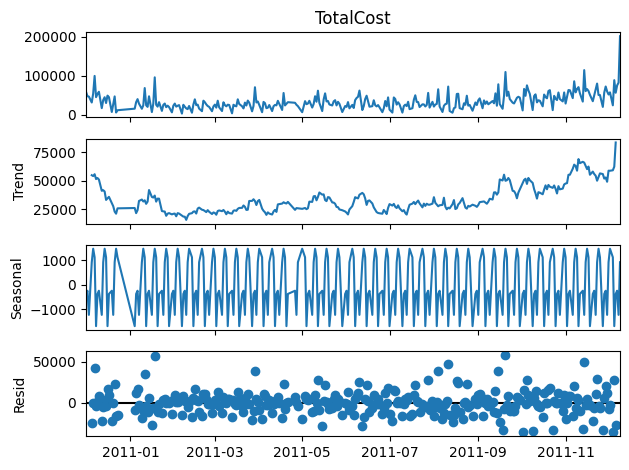

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the daily revenue time series
result = seasonal_decompose(daily_revenue, model='additive', period=7)  # Using a weekly seasonality assumption

# Plot the decomposed components
result.plot()
plt.show()
